In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#importing dataset
data = pd.read_csv('office_supplies.csv')
data.head(5)

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2015-110870,2015-12-12,First Class,West,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,299.94,6,0.0,NaN
1,CA-2015-110870,2015-12-12,First Class,West,OFF-SU-10001225,Office Supplies,Supplies,Staple remover,25.76,7,0.0,NaN
2,CA-2014-143210,2014-12-01,First Class,East,TEC-PH-10004434,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,271.90,2,0.0,NaN
3,CA-2014-143210,2014-12-01,First Class,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",45.84,3,0.0,NaN
4,CA-2014-143210,2014-12-01,First Class,East,FUR-FU-10002268,Furniture,Furnishings,Ultra Door Push Plate,9.82,2,0.0,NaN


Ceaning The Data

In [3]:
#getting data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9993 non-null   object 
 1   Order Date    9993 non-null   object 
 2   Ship Mode     9993 non-null   object 
 3   Region        9993 non-null   object 
 4   Product ID    9993 non-null   object 
 5   Category      9993 non-null   object 
 6   Sub-Category  9993 non-null   object 
 7   Product Name  9993 non-null   object 
 8   Sales         9993 non-null   float64
 9   Quantity      9993 non-null   int64  
 10  Discount      9993 non-null   float64
 11  Profit        8000 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.0+ KB


The **profit** column has less count because some rows are empty. We would get rid of that by replacing the null values with o

In [48]:
#replacing null values in profit column
data_1 = data.replace(np.nan, 0)
data_1.head(5)

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2015-110870,2015-12-12,First Class,West,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,299.94,6,0.0,0.0
1,CA-2015-110870,2015-12-12,First Class,West,OFF-SU-10001225,Office Supplies,Supplies,Staple remover,25.76,7,0.0,0.0
2,CA-2014-143210,2014-12-01,First Class,East,TEC-PH-10004434,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,271.90,2,0.0,0.0
3,CA-2014-143210,2014-12-01,First Class,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",45.84,3,0.0,0.0
4,CA-2014-143210,2014-12-01,First Class,East,FUR-FU-10002268,Furniture,Furnishings,Ultra Door Push Plate,9.82,2,0.0,0.0


In [49]:
#getting info of the data
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9993 non-null   object 
 1   Order Date    9993 non-null   object 
 2   Ship Mode     9993 non-null   object 
 3   Region        9993 non-null   object 
 4   Product ID    9993 non-null   object 
 5   Category      9993 non-null   object 
 6   Sub-Category  9993 non-null   object 
 7   Product Name  9993 non-null   object 
 8   Sales         9993 non-null   float64
 9   Quantity      9993 non-null   int64  
 10  Discount      9993 non-null   float64
 11  Profit        9993 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.0+ KB


All empty rows in Profit have been replaced.

In [6]:
#getting descriptive statistics of data
data_1.describe()

,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000
mean,229.854588,3.789553,0.156218,22.523152
std,623.276194,2.225220,0.206456,203.708204
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,0.000000
50%,54.480000,3.000000,0.200000,4.884000
75%,209.940000,5.000000,0.200000,21.098000
max,22638.480000,14.000000,0.800000,8399.976000


We would be deleting some columns as they won't be of any help with the analysis **Product ID**, **Ship Mode** and **Order ID**.

'Product ID' = This column is a repitition of what we have in the category and sub category columns.

'Ship Mode' = From the dataset we can se that the ship mode is spread across the orders in differnet region and doesn't play a significant role in sales.

'Order ID' = The order ID is for individul orders(a bulk order) hence you see it repeated across different products, since we are dealing with sales analysis for specific products we would delete that also.

In [51]:
#deleting Product ID, Ship Mode and Order ID columns
of_sup_data = data_1.drop(['Order ID', 'Ship Mode', 'Product ID' ], axis = 1)
of_sup_data.head(5)

,Order Date,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2015-12-12,West,Technology,Accessories,Logitech Wireless Marathon Mouse M705,299.94,6,0.0,0.0
1,2015-12-12,West,Office Supplies,Supplies,Staple remover,25.76,7,0.0,0.0
2,2014-12-01,East,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,271.90,2,0.0,0.0
3,2014-12-01,East,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",45.84,3,0.0,0.0
4,2014-12-01,East,Furniture,Furnishings,Ultra Door Push Plate,9.82,2,0.0,0.0


Now that the data has been clenaed we would go ahead with uniravariate and multivariate analysis

# UNIVARIATE ANALYSIS

### Order Date Analysis

In [8]:
#calling the columns
of_sup_data.columns

Index(['Order Date', 'Region', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [52]:
#getting the value count of Order date Column
of_sup_data['Order Date'].value_counts()

2016-09-05    38
2017-09-02    36
2016-11-10    35
2017-12-01    34
2017-12-02    34
              ..
2015-04-14     1
2014-06-14     1
2015-01-28     1
2014-01-15     1
2016-07-20     1
Name: Order Date, Length: 1237, dtype: int64

**Findings:** The date with the highest order is 2016-09-05 and there are couple of dates with the lowest order of 1. Later we would compare the regions to the dates to know which regions are performing well and which aren't

### Region Analysis

In [53]:
of_sup_data['Region'].value_counts()

West       3203
East       2848
Central    2322
South      1620
Name: Region, dtype: int64

**Findings:** The region with the highest number of orders is the West and the region with Lowest number of orders is the south. We would perform further analysis later to confirm this. As the factors affecting sales isn't just the number of orders but the quantity ordered and the profits made

### Category Analysis

In [54]:
of_sup_data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1846
Name: Category, dtype: int64

### Sub-Category Analysis

In [55]:
of_sup_data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          888
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

We can see that there are only 3 categories and 17 subcategories. 

### Product Name Analysis

In [56]:
of_sup_data['Product Name'].value_counts()

Staple envelope                                                             48
Easy-staple paper                                                           46
Staples                                                                     46
Avery Non-Stick Binders                                                     20
Staples in misc. colors                                                     19
                                                                            ..
Xerox 1901                                                                   1
Pyle PRT45 Retro Home Telephone                                              1
Lexmark X 9575 Professional All-in-One Color Printer                         1
Hewlett-Packard Deskjet 3050a All-in-One Color Inkjet Printer                1
Bush Westfield Collection Bookcases, Dark Cherry Finish, Fully Assembled     1
Name: Product Name, Length: 1850, dtype: int64

### Sales Analysis

In [57]:
of_sup_data['Sales'].value_counts()

12.960     56
15.552     39
19.440     39
10.368     36
32.400     28
           ..
21.336      1
206.112     1
247.104     1
26.180      1
57.680      1
Name: Sales, Length: 6061, dtype: int64

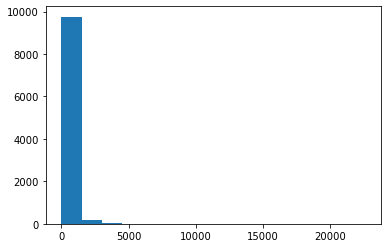

In [58]:
#graphical analysis
#plotting a histogram
plt.hist(of_sup_data['Sales'], bins = 15)
plt.show()

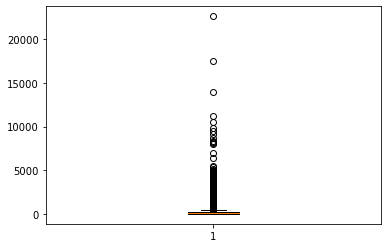

In [59]:
#we would plot a boxplot to have a better umderstanding of the price column
plt.boxplot(of_sup_data['Sales'])
plt.show()

In [60]:
#There are a alot of outliers lets see the outlier range
# Useful parameters
sales_first_quartile = 17.280000
sales_second_quartile = 54.480000
sales_third_quartile = 209.940000
sales_mean = 229.854588
sales_IQR = sales_third_quartile - sales_first_quartile
sales_outlier_range = sales_third_quartile + (1.5 * sales_IQR)
print(sales_outlier_range)

498.93


In [61]:
#accessing the number of sales greater than the median_sales
len(of_sup_data.loc[of_sup_data['Sales'] > sales_second_quartile])

4996

**4996(50%)** of the commodities have their prices greater than the median(54.48). If half of all the sales have high prices, then sales are **generally high**.

### Quantity analysis

In [63]:
of_sup_data['Quantity'].value_counts()

3     2409
2     2402
5     1230
4     1190
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: Quantity, dtype: int64

### Discount Analysis

In [64]:
of_sup_data['Discount'].value_counts()

0.00    4797
0.20    3657
0.70     418
0.80     300
0.30     227
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: Discount, dtype: int64

### Profit Analysis

In [84]:
#getting value count of Discount column
of_sup_data['Profit'].value_counts()

0.0000     2044
6.2208       33
9.3312       30
3.6288       28
5.4432       27
           ... 
1.5588        1
9.5448        1
56.9943       1
19.8716       1
19.0344       1
Name: Profit, Length: 6291, dtype: int64

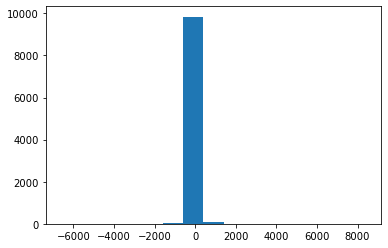

In [66]:
#graphical analysis
#plotting a histogram
plt.hist(of_sup_data['Profit'], bins = 15)
plt.show()

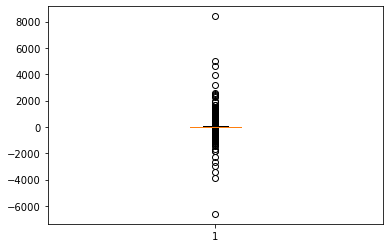

In [67]:
#we would plot a boxplot to have a better umderstanding of the profit column
plt.boxplot(of_sup_data['Profit'])
plt.show()

In [24]:
#There are a alot of outliers lets see the outlier range
# Useful parameters
profit_first_quartile = 0.000000
profit_second_quartile = 4.884000
profit_third_quartile = 21.098000
profit_mean = 22.523152
profit_IQR = profit_third_quartile - profit_first_quartile
profit_outlier_range = profit_third_quartile + (1.5 * profit_IQR)
print(profit_outlier_range)

52.745


In [25]:
# Accessing number of sales profit below the median_profit
len(of_sup_data.loc[of_sup_data['Profit'] < profit_second_quartile])

4996

In [26]:
# Accessing number of sales profit which are outliers 
len(of_sup_data.loc[of_sup_data['Profit'] > profit_outlier_range])

1341

In [27]:
# Accessing number of sales profit below the mean_profit
len(of_sup_data.loc[of_sup_data['Profit'] < profit_mean])

7595

In [28]:
# Accessing number of sales profit with 0 profit
len(of_sup_data.loc[of_sup_data['Profit'] == 0])

2044

In [69]:
# Accessing number of sales profit with 0 profit
len(of_sup_data.loc[of_sup_data['Profit'] < 0])

1454

**Findings:** From the figures above we can see that **2044(20.4%)** of the sales yielded **no profit**. 

**2952(29.5%)** yielded between **GH₵0.1 - GH₵4.9**. 

**1341(13.4%)** yielded **very high profits**.  

**3655(36.6%)** yielded **fairly good profits**

**1454(14.55%)** run into a loss **a loss**
We can say that generally profits are averagely high

# Multivariate Analysis

1. Is selling the same products in all regions leading to unsold products in some Regions? To Find out we would do a multivariate analysis on the following columns : Region, Category, sales, profit, sub-category groupby of the regions and product name and plot it by the sales and profit

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

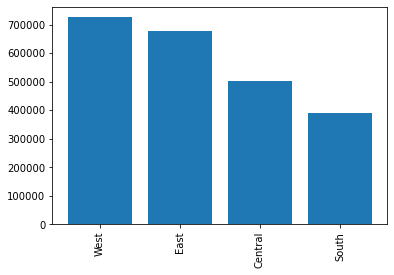

In [73]:
# PLotting Region against Sales
Region = ['West', 'East', 'Central', 'South']
plt.bar(Region, of_sup_data.groupby(['Region'])['Sales'].sum().sort_values(ascending = False))
plt.xticks(rotation=90)


([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

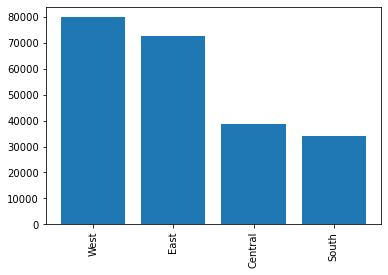

In [74]:
# PLotting Region against Profit
Region = ['West', 'East', 'Central', 'South']
plt.bar(Region, of_sup_data.groupby(['Region'])['Profit'].sum().sort_values(ascending = False))
plt.xticks(rotation=90)

In [86]:
#getting the sum of profit, sales and quantity to Region
of_sup_data.groupby(['Region'])['Profit', 'Sales', 'Quantity'].sum()

C:\Users\Lillian\AppData\Local\Temp/ipykernel_4092/1178709499.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  of_sup_data.groupby(['Region'])['Profit', 'Sales', 'Quantity'].sum()


,Profit,Sales,Quantity
Region,,,
Central,34094.4879,500975.9308,8776
East,72473.6505,678781.2400,10618
South,38766.3684,391721.9050,6209
West,79739.3558,725457.8245,12266


C:\Users\Lillian\AppData\Local\Temp/ipykernel_4092/3547329482.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  of_sup_data.groupby(['Region'])['Profit', 'Sales', 'Quantity'].sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,figsize=(15,10),


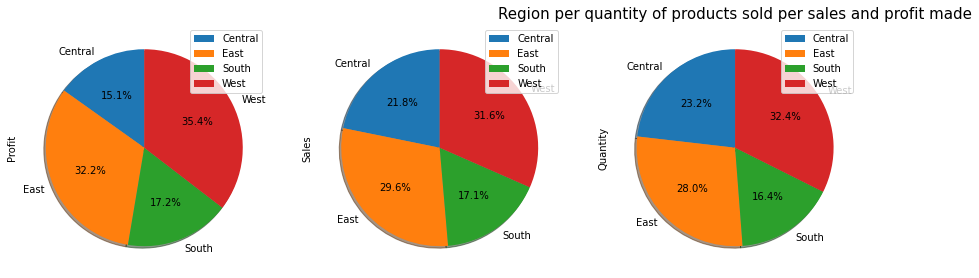

In [87]:
# PLotting Region against Profit sales and  and Yield
of_sup_data.groupby(['Region'])['Profit', 'Sales', 'Quantity'].sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,figsize=(15,10), 
                                        autopct='%1.1f%%')
plt.title('Region per quantity of products sold per sales and profit made', fontsize=15)
plt.show()

From the bar graph we can see that the region with the **highest sales** is the **West** and the **least** is the **south** same applies to the profit. From the pie chart we can see that the quantity to sales to profit ratio is not consistent across the Central Region we would later analyse this to see the factors resulting to this


Let's find out the distribution of products sold across the regions

In [88]:
#Getting the value count of products sold in each Region
of_sup_data.groupby(['Category'])['Region'].value_counts()

Category         Region 
Furniture        West        707
                 East        601
                 Central     481
                 South       332
Office Supplies  West       1897
                 East       1712
                 Central    1422
                 South       995
Technology       West        599
                 East        535
                 Central     419
                 South       293
Name: Region, dtype: int64

In [91]:
#finding out which Region sold the most in each Category
of_sup_data.groupby(['Category'])['Region'].max()

Category
Furniture          West
Office Supplies    West
Technology         West
Name: Region, dtype: object

In [92]:
#finding out which Region sold the least in each Category
of_sup_data.groupby(['Category'])['Region'].min()

Category
Furniture          Central
Office Supplies    Central
Technology         Central
Name: Region, dtype: object

In [93]:
#finding out which Region sold the most in each sub-Category
of_sup_data.groupby(['Sub-Category'])['Region'].max()

Sub-Category
Accessories    West
Appliances     West
Art            West
Binders        West
Bookcases      West
Chairs         West
Copiers        West
Envelopes      West
Fasteners      West
Furnishings    West
Labels         West
Machines       West
Paper          West
Phones         West
Storage        West
Supplies       West
Tables         West
Name: Region, dtype: object

In [94]:
#finding out which Region sold the least in each Sub-Category
of_sup_data.groupby(['Sub-Category'])['Region'].min()

Sub-Category
Accessories    Central
Appliances     Central
Art            Central
Binders        Central
Bookcases      Central
Chairs         Central
Copiers        Central
Envelopes      Central
Fasteners      Central
Furnishings    Central
Labels         Central
Machines       Central
Paper          Central
Phones         Central
Storage        Central
Supplies       Central
Tables         Central
Name: Region, dtype: object

a. Though **South** has the least in quantity, sales, and profit , **Central** has the minimum count for each product. Earlier on we saw this irregularities from the pie chart of 'quantity to sales to profit ratio'

The region Central had product quantity of 23.2%, sales of 21.8% and profit of 15.1%. There is a decline while other regions have an increase or steady ratio in the same categories. Hence resulting in Region central having the lowest sales though it was 3rd in Value count.


b. Ratio of the distribution of products category sold across the regions is almost the same for each category

West:      31.90%        31%      32% for Furniture  Office supply and Tech respectively

East:      27 %        28%      28%

Central:     21.7%        23%      23%

South :      15%         16%     15.8%

**Findings:** We can see that the sales of all product types for each region produces the same result(percentage). There are no irregularities say If we had at least 5 products having a high sale in the south, east or central, but low in the west, then we could conclude that selling the same products is resulting in unproductivity of certain regions. **We can conclude that selling the same products in all regions does not affect sales**.

*There are no products that do not sell well in certain region. As the sales of all products for one region have the same percentage. It has to do with how the region is going about the sales and not the products being sold.

2. Finding the popularity of products in various regions

In [37]:
#getting the value count of sub-Category
of_sup_data['Sub-Category'].value_counts(ascending=True)

Copiers          68
Machines        115
Supplies        190
Fasteners       217
Bookcases       228
Envelopes       254
Tables          319
Labels          364
Appliances      466
Chairs          617
Accessories     775
Art             796
Storage         846
Phones          888
Furnishings     957
Paper          1370
Binders        1523
Name: Sub-Category, dtype: int64

In [38]:
#getting the value count of Category
of_sup_data['Category'].value_counts(ascending=True)

Technology         1846
Furniture          2121
Office Supplies    6026
Name: Category, dtype: int64

In [96]:
#finding out the performance of products in all regions
of_sup_data.groupby(['Region'])['Category'].value_counts()

Region   Category       
Central  Office Supplies    1422
         Furniture           481
         Technology          419
East     Office Supplies    1712
         Furniture           601
         Technology          535
South    Office Supplies     995
         Furniture           332
         Technology          293
West     Office Supplies    1897
         Furniture           707
         Technology          599
Name: Category, dtype: int64

array([<AxesSubplot:ylabel='Quantity'>], dtype=object)

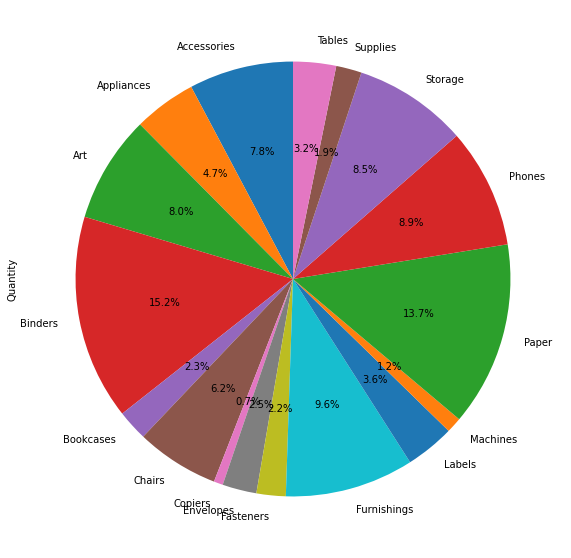

In [98]:
#plotting a pie chart show the performance of products in all regions
of_sup_data.groupby(['Sub-Category'])['Quantity'].count().plot(kind='pie', subplots=True, shadow = False,startangle=90,figsize=(10,10), 
                                        autopct='%1.1f%%')

We can see that the category with the **most popularity** in all regions is **office supplies** and the sub-category with the most popularity binders  which is under Office Supplies.

Also these sub categories are popular across **all regions** Binders,  Paper, Furnishings, Phones, Storage. 


**Take note of the fact that though Furnishings and Phones are not in the office supplies category they are 3rd and 4th in sub category section. This shows they have high popularity.**

3.Checking if discount affects sales

In [99]:
#getting the perfomance of the products per discount
of_sup_data.groupby(['Sub-Category'])['Sales','Discount'].sum()

C:\Users\Lillian\AppData\Local\Temp/ipykernel_4092/2016318694.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  of_sup_data.groupby(['Sub-Category'])['Sales','Discount'].sum()


,Sales,Discount
Sub-Category,,
Accessories,167380.3180,60.80
Appliances,107532.1610,77.60
Art,27118.7920,59.60
Binders,203412.7330,567.00
Bookcases,114879.9963,48.14
Chairs,328449.1030,105.00
Copiers,149528.0300,11.00
Envelopes,16476.4020,20.40
Fasteners,3024.2800,17.80


In [101]:
#getting the profit of the category per discount
of_sup_data.groupby(['Category'])['Sales','Discount'].sum()

C:\Users\Lillian\AppData\Local\Temp/ipykernel_4092/1034145086.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  of_sup_data.groupby(['Category'])['Sales','Discount'].sum()


,Sales,Discount
Category,,
Furniture,741999.7953,368.89
Office Supplies,719047.0320,947.80
Technology,835890.0730,244.40


In [102]:
#getting the profit of the products per discount
of_sup_data.groupby(['Sub-Category'])['Profit','Discount'].sum()

C:\Users\Lillian\AppData\Local\Temp/ipykernel_4092/783212913.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  of_sup_data.groupby(['Sub-Category'])['Profit','Discount'].sum()


,Profit,Discount
Sub-Category,,
Accessories,34178.3898,60.80
Appliances,14819.7536,77.60
Art,5243.7949,59.60
Binders,20775.3364,567.00
Bookcases,-3539.4843,48.14
Chairs,22956.2429,105.00
Copiers,43747.9417,11.00
Envelopes,6119.9244,20.40
Fasteners,818.5984,17.80


Findings: The highest sub- category sales is Phones	329743.0940 with a sum of 137.40 discounts which is not the highest sum of discounts But Binders	with sales of 203412.7330 has the highest sum of discpunts. We can say that discounts doesnt directly affect the sales as some commodities with low discounts sums have a fairly high sales

**NB: There has to be an investigation of these sub categories Tables, Supplies, Machines, Bookcases these are producing losses as their pprofits are in the negative margins. The sales made from these products shouldnt result in a loss**


In [103]:
corr = of_sup_data.corr()
corr.style.background_gradient()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200794,-0.028187,0.369184
Quantity,0.200794,1.000000,0.008630,0.056094
Discount,-0.028187,0.008630,1.000000,-0.203648
Profit,0.369184,0.056094,-0.203648,1.000000


As stated earlier discount does not affect sales. Sales  has a fairly positive impact on profit.